# Customer Churn Prediction (Task 3) CodSoft ML Internship

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning)

# Load Dataset

In [34]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
drop_cols=['RowNumber', 'CustomerId', 'Surname']
df.drop(drop_cols, axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [40]:
X = df.drop('Exited', axis=1)
y = df['Exited']
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Visualization

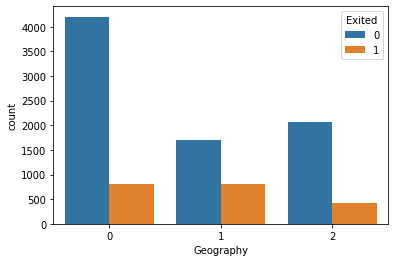

In [42]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

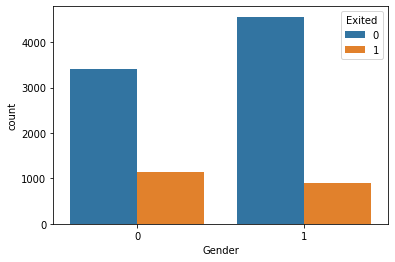

In [43]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

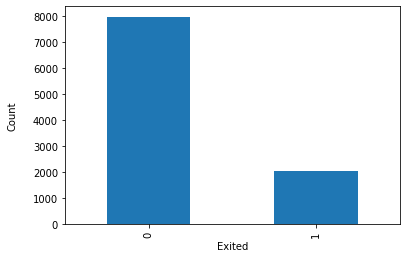

In [44]:
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited\n')
plt.ylabel('Count\n')
plt.show()

# Model Training

In [45]:
rfc = RandomForestClassifier(n_estimators = 200)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
print("Random Forest Accuracy Score is: {}%" .format(rfc_accuracy * 100))

Random Forest Accuracy Score is: 86.65%


In [46]:
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(X_train, y_train)

gbc_preds = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_preds)
print("Gradient Boosting Accuracy Score is: {}%" .format(gbc_accuracy  * 100 ))

Gradient Boosting Accuracy Score is: 86.65%


# Confusion matrix of both models

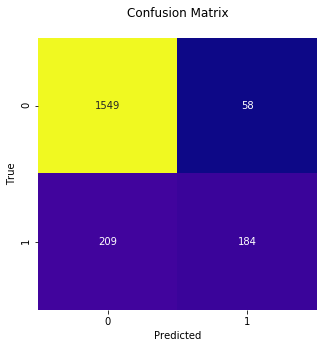

In [47]:
cm = confusion_matrix(y_test,rfc_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',cmap="plasma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix\n")
plt.show()

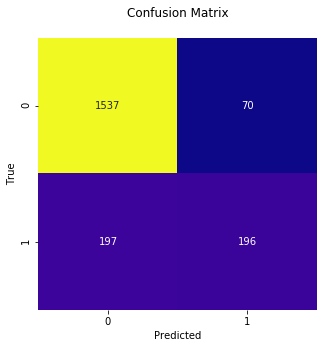

In [48]:
cm = confusion_matrix(y_test,gbc_preds)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',cmap="plasma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix\n")
plt.show()